<a href="https://colab.research.google.com/github/FGalvao77/others-knowledge-in-python-for-data-science/blob/main/Guia_de_Machine_Learning_%E2%80%93_Clusteriza%C3%A7%C3%A3o_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clusterização K-Means**

**Case com os
dados de Vinho**

## **O que é Clusterização ?**

Clusterização é a tarefa de dividir a população ou os pontos de
dados em vários grupos, de modo que os pontos de dados nos
mesmos grupos sejam mais semelhantes a outros pontos de
dados no mesmo grupo do que os de outros grupos. Em palavras
simples, o objetivo é segregar grupos com traços semelhantes e
atribuí-los a clusters.

Vamos exemplificar:

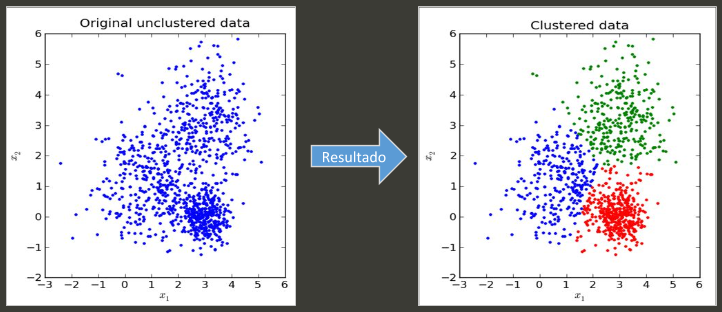

- http://carlosbaia.com/2016/07/17/introducao-ao-machine-learning/

Basicamente vamos criar grupos com as mesmas caracterizadas.

Este dataset se encontra no site **[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/wine)**

In [ ]:
# importando as bibliotecas necessárias
import pandas as pd               # para modelagem de dados
import numpy as np                # para recursos matemáticos
import seaborn as sns             # para plotagem de dados em formato gráfico
import matplotlib.pyplot as plt   # para plotagem de dados em formato gráfico

In [ ]:
# realizando o carregamento do conjunto de dados para google colab
from google.colab import files  # biblioteca utilizada para carregar os dados para o google colab
uploaded = files.upload()

Saving wine.data to wine.data


In [ ]:
# realizando a leitura da base de dados
df = pd.read_csv('wine.data')

In [ ]:
# visualizando as 10 primeiras linhas
df.head(10)

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
5,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
6,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
7,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
8,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045
9,1,14.10,2.16,2.30,18.0,105,2.95,3.32,0.22,2.38,5.75,1.25,3.17,1510


In [ ]:
# removendo as colunas desnecessárias
df.drop(['1'], axis =1, inplace=True)

Perceba que, não há cabeçalho nas colunas. E devemos tratar desse problema!

Para isso, irei instanciar manualmente os ``headers``.

In [ ]:
# instanciando manualmente os nomes das colunas
headers = ['alcohol', 'malic_acid', 'ash', 'ash_alcanity', 'magnesium', 
           'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 
           'proanthocyanins', 'color_intensity', 'hue', 'od280', 'proline']

In [ ]:
# verificando se os nomes instanciados e igual a quantidade de colunas no df
print(len(headers))
print(len(df.columns))

13
13


In [ ]:
# verificando através de uma condiconal
print([len(headers)] == [len(df.columns)])

True


In [ ]:
# lendo novamente o dataset e agregando seus headers
df = pd.read_csv('wine.data', names=headers)

In [ ]:
# verificando se os nomes das colunas foram agregados
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'ash_alcanity', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue', 'od280', 'proline'],
      dtype='object')

In [ ]:
# verificando a quantidade de linhas e colunas
df.shape

(178, 13)

In [ ]:
# informações gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 1 to 3
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   alcohol               178 non-null    float64
 1   malic_acid            178 non-null    float64
 2   ash                   178 non-null    float64
 3   ash_alcanity          178 non-null    float64
 4   magnesium             178 non-null    int64  
 5   total_phenols         178 non-null    float64
 6   flavanoids            178 non-null    float64
 7   nonflavanoid_phenols  178 non-null    float64
 8   proanthocyanins       178 non-null    float64
 9   color_intensity       178 non-null    float64
 10  hue                   178 non-null    float64
 11  od280                 178 non-null    float64
 12  proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 19.5 KB


In [ ]:
# visualizando dados estatísticos
df.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
ash_alcanity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


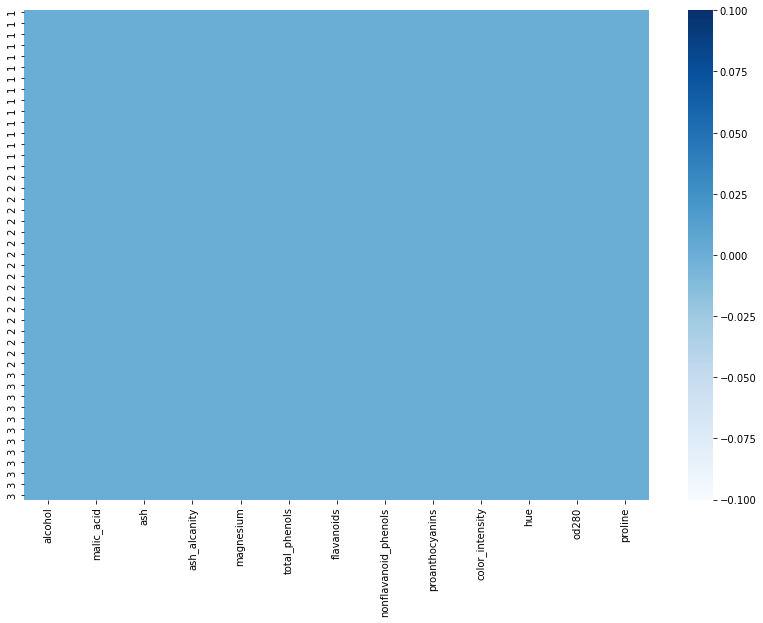

In [ ]:
# verificando se há valores nulos no df
# para isso, usaremos uma visualização gráfica
# caso exista, haverá linhas brancas no gráfico
plt.figure(figsize=(14,9))
sns.heatmap(df.isnull(), cmap='Blues', cbar=True);

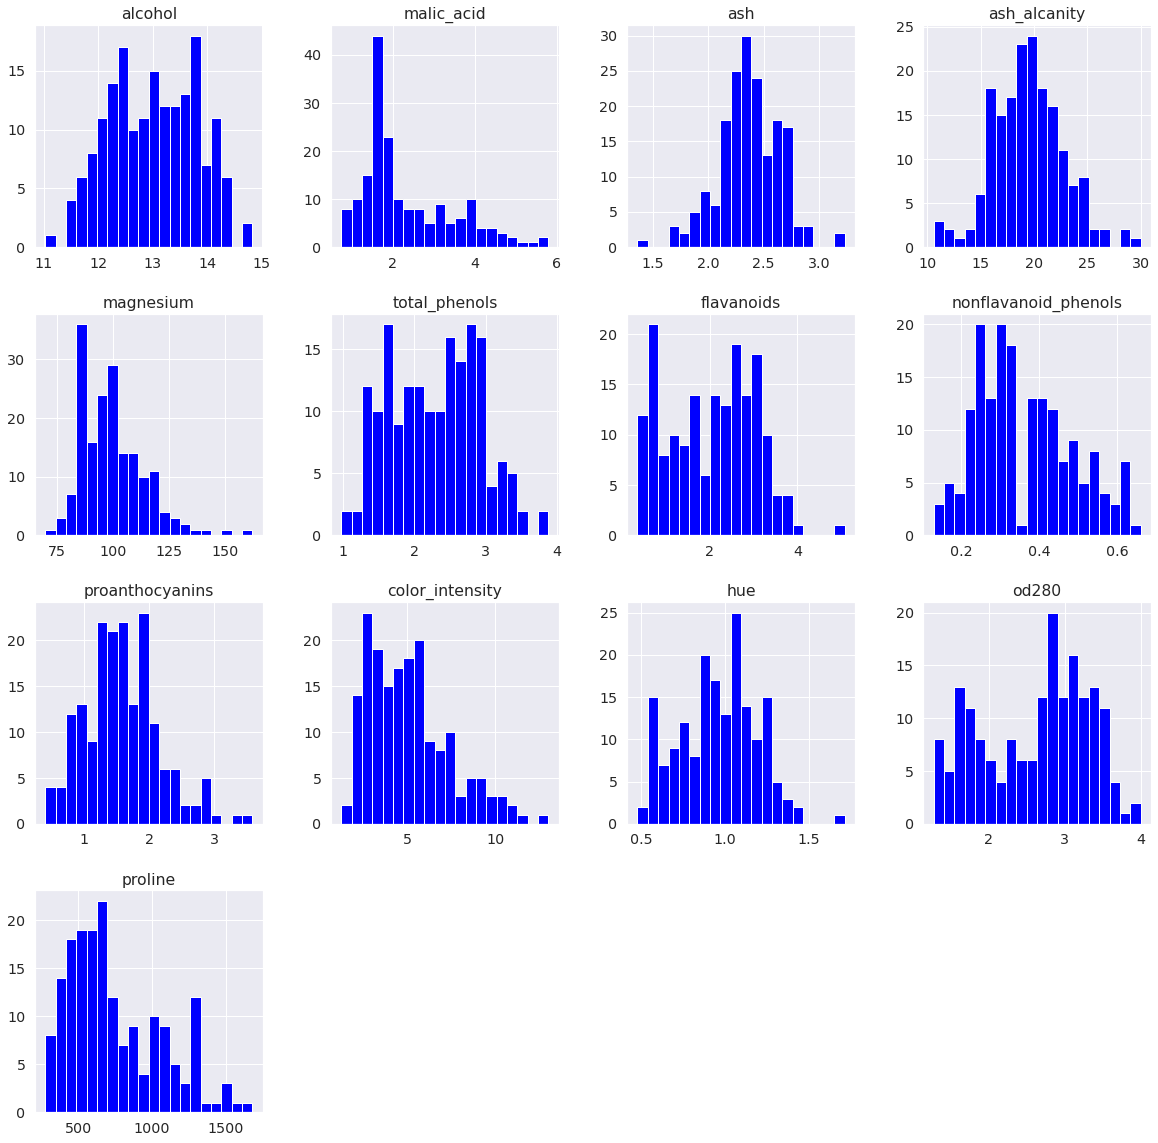

In [ ]:
# plotando todos os dados
sns.set(font_scale=1.3, rc={'figure.figsize':(20,20)})
ax = df.hist(bins=20, color='blue');

**Agora vamos visualizar as correlações dos dados**

In [ ]:
# função para analisar a correlação
corr = df.corr()

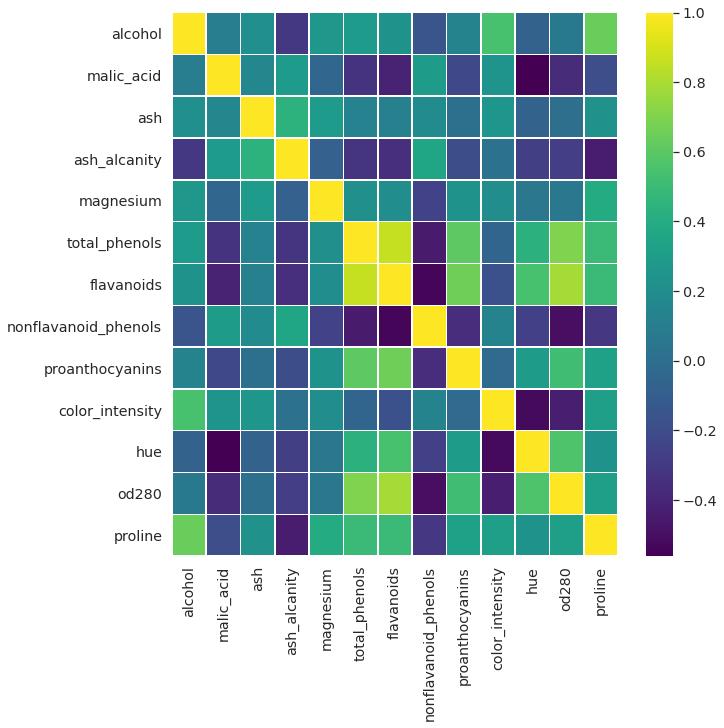

In [ ]:
# definindo o tamanho do gráfico
plt.figure(figsize=(10,10))
# fazendo o plot do gráfico
sns.heatmap(corr, linewidths=0.5, cmap='viridis');

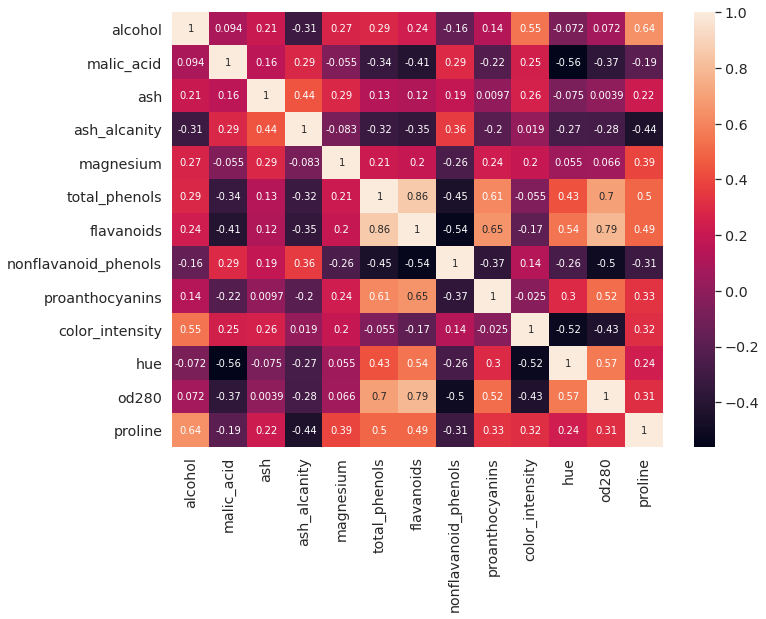

In [ ]:
# plotando gráfico de calor para uma melhor visualização da correlação do df_train
# agora com os valores das correlações
corr = df.corr()
ax = plt.subplots(figsize=(11, 8))
sns.heatmap(corr,  annot=True, annot_kws={"size": 10});

## **Realizando um pré-processamento dos dados**

Aqui precisamos fazer um escalonamento dos dados. Isto é, deixar em escalas próximas para que o nosso modelo possa ser melhor treinando.

In [ ]:
# importando a biblioteca necessária para escalonar os dados
from sklearn.preprocessing import StandardScaler

In [ ]:
# vamos realizar uma cópia da base de dados 
# para não sobrescrever a original quando aplicarmos o pré-processamento
df_02 = df.copy()   # a função ".copy()" realiza a cópia da base de dados

In [ ]:
# realizando o escalonamento dos dados
model = StandardScaler()    # instanciando a função não variavel "model"
dados_escalonados = model.fit_transform(df_02)

In [ ]:
# visualizando os dados escalonados
dados_escalonados

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [ ]:
# verificando somente os primeiros quatro registros
dados_escalonados[0:4]

array([[ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
         0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
         0.36217728,  1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, -2.49084714,  0.01814502,
         0.56864766,  0.73362894, -0.82071924, -0.54472099, -0.29332133,
         0.40605066,  1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, -0.2687382 ,  0.08835836,
         0.80899739,  1.21553297, -0.49840699,  2.13596773,  0.26901965,
         0.31830389,  0.78858745,  1.39514818],
       [ 1.69154964, -0.34681064,  0.4879264 , -0.80925118,  0.93091845,
         2.49144552,  1.46652465, -0.98187536,  1.03215473,  1.18606801,
        -0.42754369,  1.18407144,  2.33457383]])

In [ ]:
# aplicando a redução de dimensionalidade
# reduzindo de 10 variáveis para duas
# importando a biblioteca necessária
from sklearn.decomposition import PCA

In [ ]:
# instanciando a função na variável "funcao_PCA"
funcao_PCA = PCA(n_components=2)
# aplicando a função
dados_PCA = funcao_PCA.fit_transform(dados_escalonados)

In [ ]:
# verificando os primeiros 5 registros
dados_PCA[0:5]

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ],
       [ 3.75706561, -2.75637191],
       [ 1.00890849, -0.86983082]])

In [ ]:
# importando o K-means
from sklearn.cluster import KMeans

In [ ]:
# criando uma lista para gravar a distância do cluster
dist_cluster = []
repeticoes = range(1,20)

In [ ]:
# função para anaçlisar a distância do cluster
for x in repeticoes:
  # parâmetro para trocar o número de cluster
  model_kmeans = KMeans(n_clusters=x)
  # aplicando o modelo do kmeans
  model_kmeans.fit(dados_escalonados)
  # salvando a distância na lista
  dist_cluster.append(model_kmeans.inertia_)

In [ ]:
# verificando os valores
dist_cluster

[2314.0,
 1658.7588524290954,
 1277.9284888446423,
 1175.3789993448738,
 1107.7720528121838,
 1053.9353602652502,
 1001.3938936519015,
 936.4116290901027,
 896.5444203001882,
 873.1346289289129,
 816.2993521427977,
 806.8792339866068,
 770.509533415029,
 742.4046691432419,
 720.784752797056,
 701.0134044118322,
 686.6550714456985,
 658.1580494336545,
 644.082368929558]

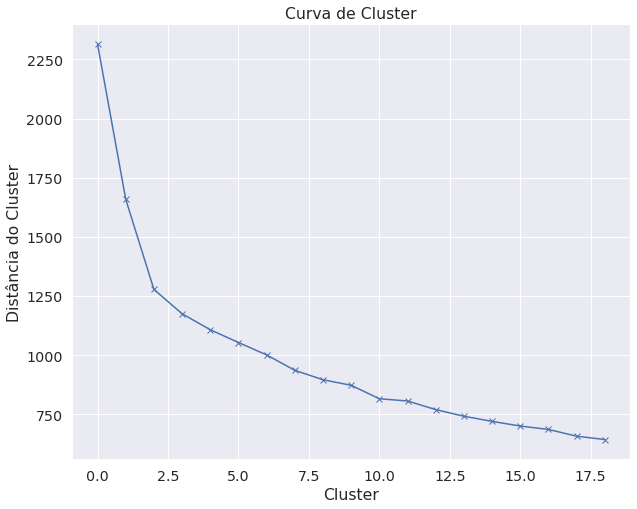

In [ ]:
# plotando a "curva do cotovelo"
# verificando o melhor número de cluster
plt.figure(figsize=(10,8))
plt.title('Curva de Cluster')
plt.plot(dist_cluster, 'bx-')
plt.xlabel('Cluster')
plt.ylabel('Distância do Cluster');

Caso queira entender melhor sobre essa técnica, sugiro essa
leitura
- https://medium.com/pizzadedados/kmeans-e-metodo-do-cotovelo-94ded9fdf3a9

**Aplicando os clusters nos dados**

In [ ]:
# definindo o número de clusters
model_kmeans = KMeans(n_clusters=3)
# aplicando a função nos dados
model_kmeans.fit(dados_escalonados)
# identificando os centróides
centroides = model_kmeans.cluster_centers_
# identificando o número do cluster
rotulos = model_kmeans.labels_

In [ ]:
# verificando a divisão dos clusters
rotulos

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [ ]:
# ajustando os dados para uma tabela
base_PCA = pd.DataFrame(dados_PCA, columns=['eixo_1', 
                                            'eixo_2'])
base_PCA.head()

,eixo_1,eixo_2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


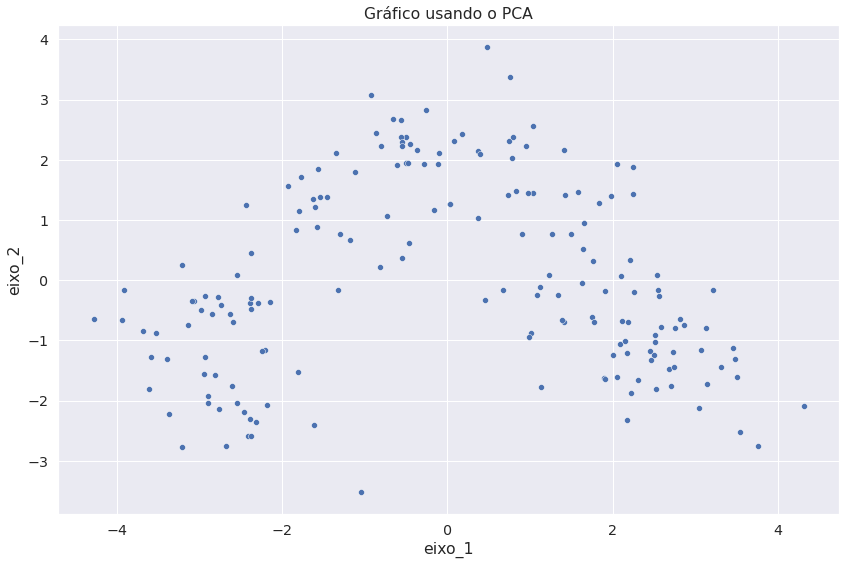

In [ ]:
# plotando o gráfico com os dados dos 2 eixos
plt.figure(figsize=(14,9))
plt.title('Gráfico usando o PCA')
sns.scatterplot(x='eixo_1', y='eixo_2', data=base_PCA);

In [ ]:
# agrupando os dados do PCA com o cluster
agrupado = pd.concat([base_PCA, pd.DataFrame({'Cluster': rotulos})],
                      axis=1)
agrupado.head()

,eixo_1,eixo_2,Cluster
0,3.316751,-1.443463,1
1,2.209465,0.333393,1
2,2.516740,-1.031151,1
3,3.757066,-2.756372,1
4,1.008908,-0.869831,1


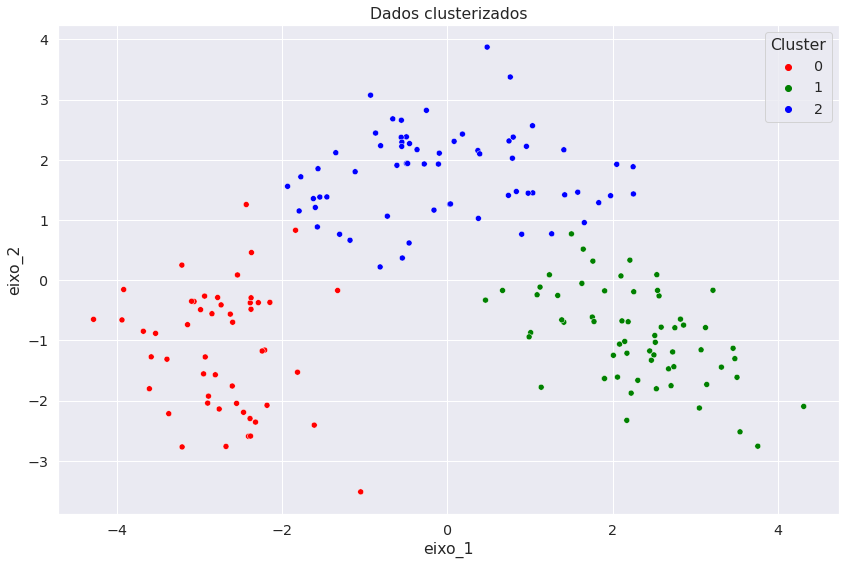

In [ ]:
# plotando o gráfico com os dados dos dois eixos
# definindo a lista de cores
cores = ['red', 'green', 'blue', 'black', 'pink', 'purple', 
         'yellow', 'gray']
# configurando a plotagem do gráfico
plt.figure(figsize=(14,9))
plt.title('Dados clusterizados')
sns.scatterplot(x='eixo_1', y='eixo_2',
                hue='Cluster', data=agrupado,
                palette=cores[0:3]);

Testei o modelo com 3 a 6 clusters.
A melhor divisão ficou entre 3 e 4, porem mantive 3 grupos. Devido
contem “poucos” registros e a divisão ficou bem homogenia e também
melhor ilustra esse tutorial.

## **Final**

Esse guia é um exemplo de uma modelo Clusterização usando o K-Means.

**Artigo sobre K-means - Analytics Vidhya**
 - https://bit.ly/32Bmbn4

**Informações sobre clusterização - Portal Data Science**
 - https://bit.ly/3dBpWPn

**Guia da documentação caso queira mais detalhes - scikit-learn.org**
 - https://bit.ly/3x8NSBL